In [21]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt

read data and metadata

In [22]:
adata = sc.read_h5ad("ad_worm_aging.h5ad")
atlas_df = pd.DataFrame(adata.X.toarray(), index=adata.obs_names, columns=adata.var_names)
atlas_meta_data = adata.obs

In [23]:
atlas_df.shape
atlas_df.head()

,homt-1,nlp-40,rcor-1,Y74C9A.9,sesn-1,Y74C9A.1,Y48G1C.12,pgs-1,Y48G1C.5,csk-1,...,H18N23.2,tmem-218,nlp-6,T23E7.8,T23E7.2,T23E7.6,cgt-2,H11L12.1,6R55.2,cTel55X.1
TCTTGCGAGTCCTGCG-1-TC2_d11_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GCTACAAGTGTGGTCC-1-TC2_d11_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TGGGAAGTCGGCTTGG-1-TC2_d11_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAGTGAACAACCGACC-1-TC2_d11_1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
GTAGCTAAGCTACGTT-1-TC2_d11_1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [24]:
cluster_explnation = pd.read_excel('s1 ad_worm_aging.xlsx', sheet_name='final cluster annotations')
cluster_explnation.head()

,Cluster ID,Curated annotations,Clusters explanatory name,Tissue type (higher degree),Putative annotation and clusters ressemblance*,Curated annotations anatomy Wbt IDs
0,cluster_0_0,seam cell,seam cell,seam,NaN,WBbt:0005753
1,cluster_1_0,"germ line, pm8","germline, pharyngeal muscle pm8",NaN,NaN,"WBbt:0005784, WBbt:0004302"
2,cluster_1_1,body wall musculature,BW muscles,muscle,NaN,WBbt:0005813
3,cluster_1_2,mu_int_L/R,intestinal muscles,muscle,NaN,WBbt:0003833
4,cluster_2_0,"hyp 12, hypodermis",posterior hypodermis,hypodermis,NaN,"WBbt:0004376, WBbt:0005733"


filter data to include onlythe neurons

In [25]:
list_of_neurons = [x for x in adata.obs['annotate_name'].unique().tolist() if "neurons" in x]
atlas_neurons_meta_data = atlas_meta_data[atlas_meta_data['annotate_name'].isin(list_of_neurons)]
atlas_neurons = atlas_df.loc[atlas_neurons_meta_data.index]
atlas_neurons_meta_data.head()

,n_counts,n_genes,timepoint,annotate_name
ACTTATCTCTCCGATC-1-TC2_d11_1,8836.0,1213,d11,128_0:RIH inter neurons
TGAATGCAGCACCGAA-1-TC2_d11_1,6709.0,2017,d11,81_0:ADL amphid neurons
CAACAACTCGAGAACG-1-TC2_d11_1,6649.0,1151,d11,128_0:RIH inter neurons
CTACCTGAGCACACCC-1-TC2_d11_1,6545.0,1064,d11,129_0:RID motor neurons
GTGTGGCAGCGTACAG-1-TC2_d11_1,6133.0,1300,d11,71_0:ASG amphid neurons


adding name of neurons and timepoint to data

In [26]:

# Extract numeric parts (the matching numbers) from both 'Cluster ID' and 'annotate_name'
cluster_explnation['cluster_num'] = cluster_explnation['Cluster ID'].str.extract(r'cluster_(\d+_\d+)')
atlas_neurons_meta_data['annotate_num'] = atlas_neurons_meta_data['annotate_name'].str.extract(r'(\d+_\d+)') 

# Aggregate 'Curated annotations' by 'cluster_num' (in case of duplicates)
cluster_explnation_agg = cluster_explnation.groupby('cluster_num')['Curated annotations'].first()

# Map 'Curated annotations' to atlas_neurons_meta_data based on the 'cluster_num' match
atlas_neurons_meta_data['Curated annotations'] = atlas_neurons_meta_data['annotate_num'].map(cluster_explnation_agg)

atlas_neurons_meta_data['timepoint'] = atlas_neurons_meta_data['timepoint'].apply(lambda x: int(x[1:]))

atlas_neurons_meta_data.head()


C:\Users\97252\AppData\Local\Temp\ipykernel_17964\2170896424.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  atlas_neurons_meta_data['annotate_num'] = atlas_neurons_meta_data['annotate_name'].str.extract(r'(\d+_\d+)')
C:\Users\97252\AppData\Local\Temp\ipykernel_17964\2170896424.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  atlas_neurons_meta_data['Curated annotations'] = atlas_neurons_meta_data['annotate_num'].map(cluster_explnation_agg)
C:\Users\97252\AppData\Local\Temp\ipykernel_17964\2170896424

,n_counts,n_genes,timepoint,annotate_name,annotate_num,Curated annotations
ACTTATCTCTCCGATC-1-TC2_d11_1,8836.0,1213,11,128_0:RIH inter neurons,128_0,RIH
TGAATGCAGCACCGAA-1-TC2_d11_1,6709.0,2017,11,81_0:ADL amphid neurons,81_0,ADL
CAACAACTCGAGAACG-1-TC2_d11_1,6649.0,1151,11,128_0:RIH inter neurons,128_0,RIH
CTACCTGAGCACACCC-1-TC2_d11_1,6545.0,1064,11,129_0:RID motor neurons,129_0,RID
GTGTGGCAGCGTACAG-1-TC2_d11_1,6133.0,1300,11,71_0:ASG amphid neurons,71_0,ASG


In [27]:
atlas_neurons = atlas_neurons.join(atlas_neurons_meta_data[['Curated annotations', 'timepoint']])
atlas_neurons = atlas_neurons.rename(columns={'Curated annotations': 'neuron', 'timepoint': 'timepoint_days'})
atlas_neurons.head()

,homt-1,nlp-40,rcor-1,Y74C9A.9,sesn-1,Y74C9A.1,Y48G1C.12,pgs-1,Y48G1C.5,csk-1,...,nlp-6,T23E7.8,T23E7.2,T23E7.6,cgt-2,H11L12.1,6R55.2,cTel55X.1,neuron,timepoint_days
ACTTATCTCTCCGATC-1-TC2_d11_1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,RIH,11
TGAATGCAGCACCGAA-1-TC2_d11_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ADL,11
CAACAACTCGAGAACG-1-TC2_d11_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,RIH,11
CTACCTGAGCACACCC-1-TC2_d11_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,RID,11
GTGTGGCAGCGTACAG-1-TC2_d11_1,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,ASG,11


filter data by neuron

In [ ]:
def separate_data_on_one_neuron(neuron):
    neuron_data = atlas_neurons[atlas_neurons['neuron'] == neuron]
    neuron_data.drop(['neuron'], axis=1, inplace=True)
    neuron_data = neuron_data.astype(float)
    return neuron_data

def drop_zero_expression_genes(df):
    df.fillna(0, inplace=True)
    deleted_columns = df.columns[(df == 0.0).all()].tolist()
    df.drop(columns=deleted_columns, inplace=True)
    print("Deleted columns:", deleted_columns)  # Drop the column
    return df


def average_sample_per_timepoint_and_gene(neuron_data):
    df = neuron_data.groupby(['timepoint_days']).mean()
    df = df.reset_index()
    return df


In [ ]:
# build data for one neuron
neuron = "ADL"
neuron_data= separate_data_on_one_neuron(neuron)
neuron_data.head()

C:\Users\97252\AppData\Local\Temp\ipykernel_17964\3811895492.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neuron_data.drop(['neuron'], axis=1, inplace=True)


,homt-1,nlp-40,rcor-1,Y74C9A.9,sesn-1,Y74C9A.1,Y48G1C.12,pgs-1,Y48G1C.5,csk-1,...,tmem-218,nlp-6,T23E7.8,T23E7.2,T23E7.6,cgt-2,H11L12.1,6R55.2,cTel55X.1,timepoint_days
TGAATGCAGCACCGAA-1-TC2_d11_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0
GTTATGGCATTGCTGA-1-TC2_d11_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0
CTACAGATCCACAGCG-1-TC2_d11_2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0
GGGTTATAGTGGTGAC-1-TC2_d11_2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0
GAGAAATTCAGGGATG-1-TC2_d11_2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0


In [ ]:
# build average data per timepoint
average_data_neuron = average_sample_per_timepoint_and_gene(neuron_data)
average_data_neuron = drop_zero_expression_genes(average_data_neuron)
average_data_neuron.shape

Deleted columns: ['Y48G1C.5', 'Y48G1C.13', 'F53G12.16', 'col-45', 'spe-8', 'F53G12.18', 'bli-3', 'ptr-11', 'puf-10', 'snpc-3.3', 'Y48G1BL.8', 'Y48G1BM.6', 'Y48G1BM.2', 'snpc-3.2', 'Y48G1BR.1', 'marc-4', 'mbtr-1', 'Y48G1A.2', 'R119.1', 'R119.3', 'W04C9.8', 'cutl-13', 'haf-4', 'Y65B4BL.3', 'Y65B4BL.4', 'Y65B4BL.7', 'Y65B4BL.6', 'Y65B4BL.1', 'Y65B4BM.3', 'ptr-21', 'Y65B4BR.1', 'ceh-9', 'grl-16', 'F56A6.5', 'F56A6.8', 'hum-7', 'sago-2', 'Y65B4A.2', 'Y65B4A.7', 'Y65B4A.9', 'Y18H1A.14', 'Y18H1A.11', 'hasp-2', 'Y18H1A.1', 'Y18H1A.4', 'rec-1', 'pif-1', 'Y18H1A.15', 'Y18H1A.18', 'col-46', 'Y18H1A.9', 'Y18H1A.8', 'T06A4.3', 'T06A4.1', 'ZC123.10', 'ZC123.1', 'gpa-16', 'Y95B8A.2', 'nas-30', 'mig-1', 'F54A5.5', 'hmbx-1', 'C54G6.3', 'madf-6', 'spp-23', 'R06A10.1', 'R06A10.5', 'R06A10.4', 'ZK993.2', 'ZK993.5', 'ceh-45', 'Y48G8AL.20', 'Y48G8AL.16', 'Y48G8AL.12', 'grh-1', 'Y48G8AR.3', 'K12C11.5', 'K12C11.3', 'K12C11.7', 'gst-25', 'Y73E7A.5', 'Y73E7A.8', 'Y71G12B.18', 'pqn-88', 'Y71G12B.33', 'Y71G12B.22

(5, 10343)

In [84]:
def plot_gene_scatter(df, selected_genes):
    # Create a figure for the scatter plots
    plt.figure(figsize=(10, 6))

    # Iterate over each gene and create a scatter plot
    for gene in selected_genes:
        plt.scatter(df['timepoint_days'], df[gene], label=gene, marker='o', s=50, alpha=0.4)  # Scatter plot for each gene

    # Customize the plot
    plt.xticks(df['timepoint_days'].unique())
    plt.xlabel('Timepoint (Days)')
    plt.ylabel('Expression Value')
    plt.title('Gene Expression Over Time (Scatter Plot)')
    plt.legend(title='Genes')

    plt.legend(title='Genes', loc='upper left', bbox_to_anchor=(1, 1))

    # Show the plot
    plt.tight_layout()
    plt.show()


def plot_gene_lines(df, selected_genes):
    # Create a figure for the line plots
    plt.figure(figsize=(10, 6))

    # Iterate over each gene and create a line plot
    for gene in selected_genes:
        plt.plot(df['timepoint_days'], df[gene], label=gene, marker='o', markersize=6, linestyle='-', linewidth=2)

    # Customize the plot
    plt.xticks(df['timepoint_days'].unique())  # Ensure timepoint values are unique on x-axis
    plt.xlabel('Timepoint (Days)')
    plt.ylabel('Expression Value')
    plt.title('Gene Expression Over Time (Line Plot)')
    plt.legend(title='Genes')

    # Show grid for better visualization
    plt.grid(True, which='both', axis='x', linestyle='--', linewidth=0.5)

    plt.legend(title='Genes', loc='upper left', bbox_to_anchor=(1, 1))
    plt.tight_layout()
    plt.show()


average data per gene and time point

C:\Users\97252\AppData\Local\Temp\ipykernel_17964\2778443663.py:19: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


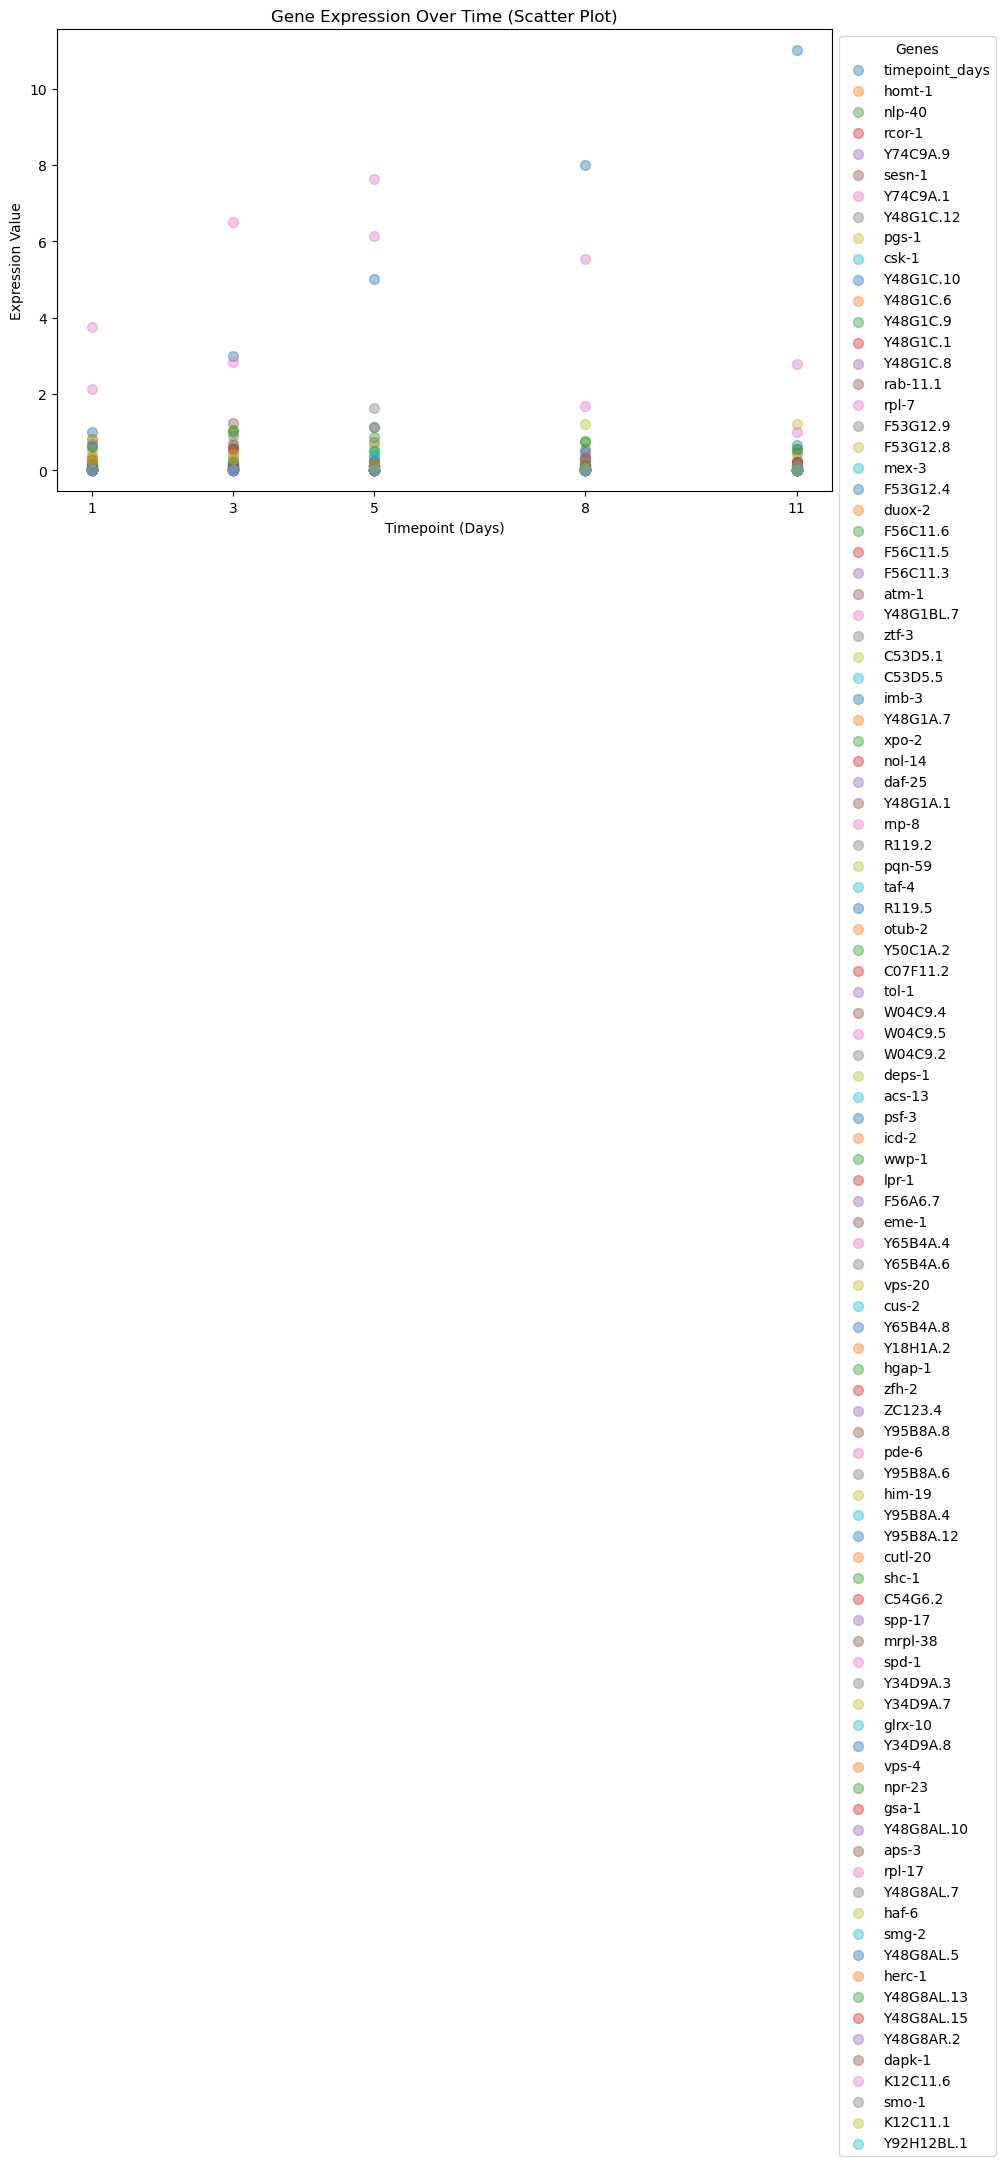

C:\Users\97252\AppData\Local\Temp\ipykernel_17964\2778443663.py:42: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


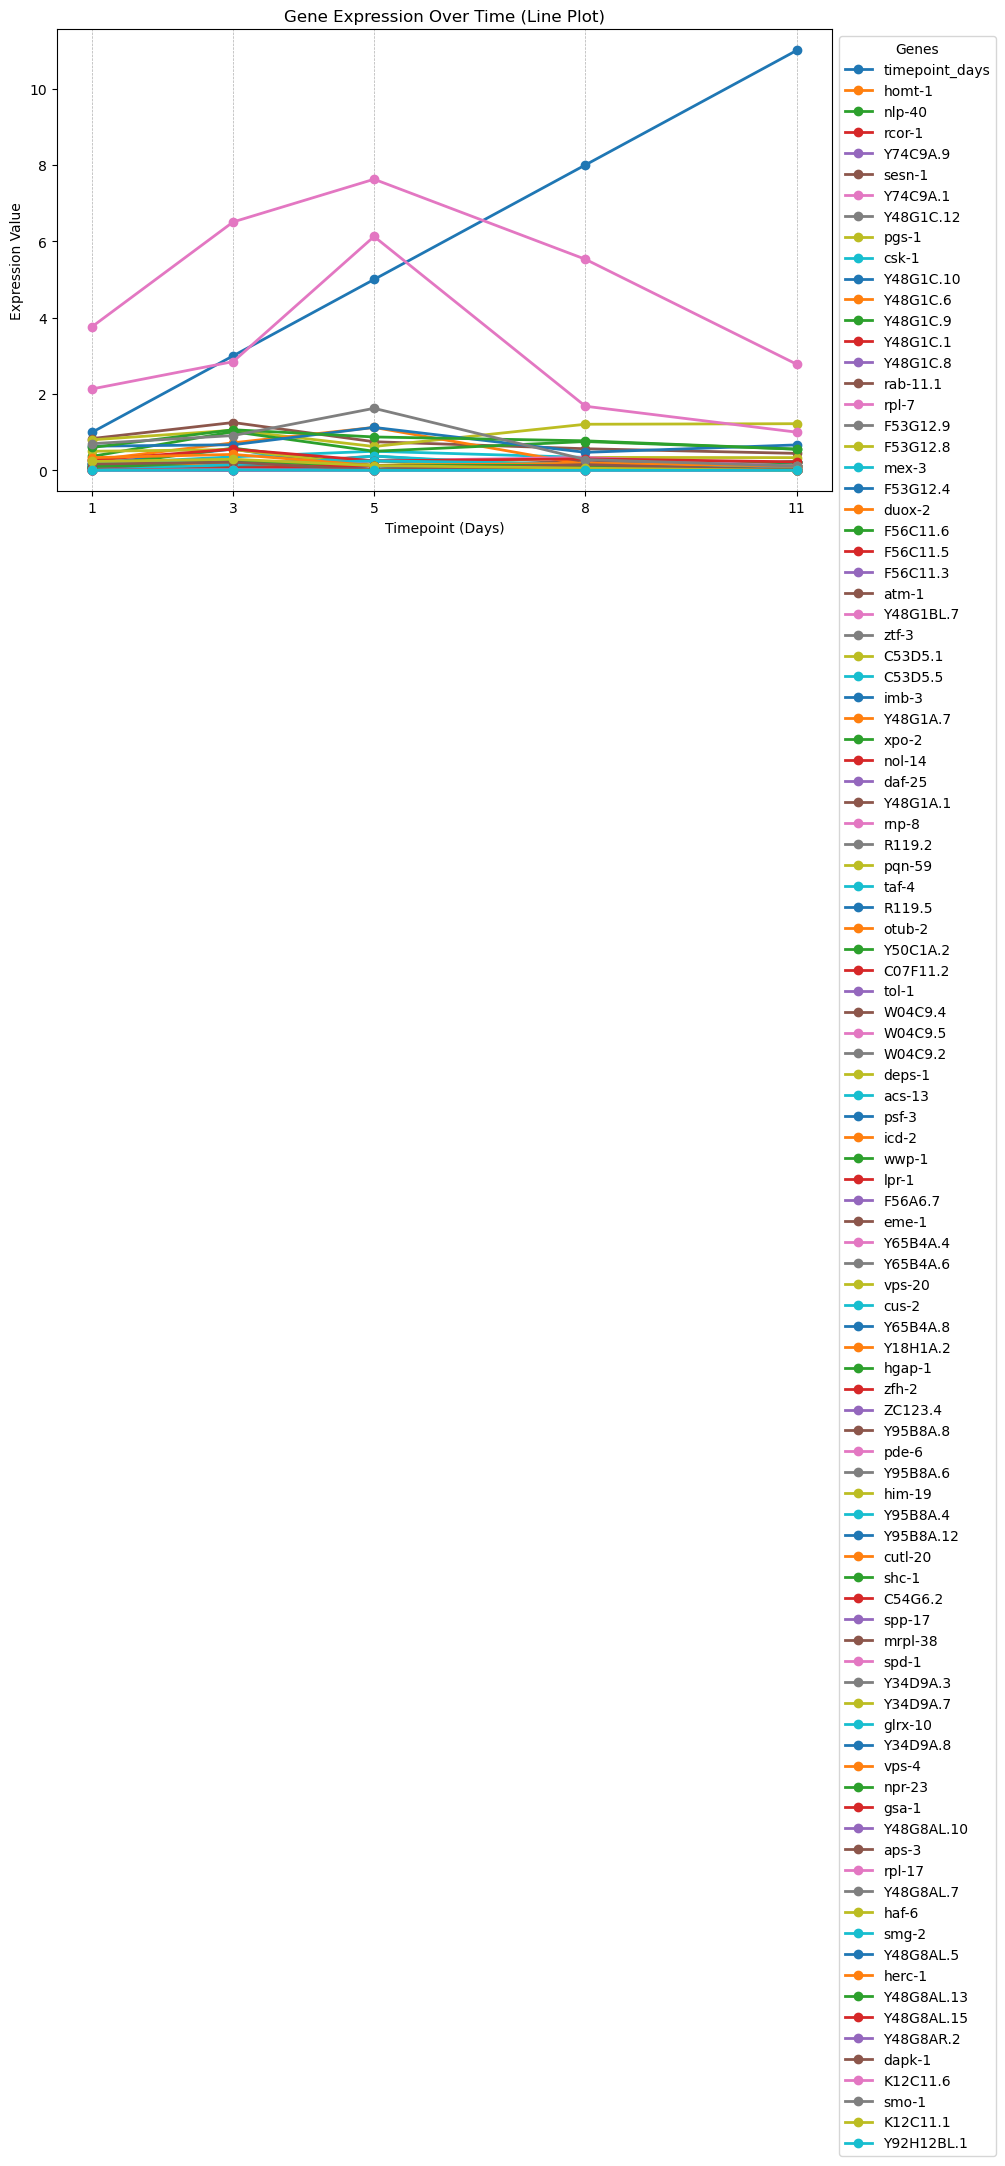

In [85]:

selected_genes = list(average_data_neuron.columns)[0:100]# ['homt-1', 'nlp-40', 'rcor-1', 'sesn-1']
plot_gene_scatter(average_data_neuron, selected_genes)
plot_gene_lines(average_data_neuron, selected_genes)

graph for all the sample that done on one neuron

In [ ]:
# Clean neuron data by dropping genes with zero expression
neuron_data = drop_zero_expression_genes(neuron_data) 

Deleted columns: ['Y48G1C.5', 'Y48G1C.13', 'F53G12.16', 'col-45', 'spe-8', 'F53G12.18', 'bli-3', 'ptr-11', 'puf-10', 'snpc-3.3', 'Y48G1BL.8', 'Y48G1BM.6', 'Y48G1BM.2', 'snpc-3.2', 'Y48G1BR.1', 'marc-4', 'mbtr-1', 'Y48G1A.2', 'R119.1', 'R119.3', 'W04C9.8', 'cutl-13', 'haf-4', 'Y65B4BL.3', 'Y65B4BL.4', 'Y65B4BL.7', 'Y65B4BL.6', 'Y65B4BL.1', 'Y65B4BM.3', 'ptr-21', 'Y65B4BR.1', 'ceh-9', 'grl-16', 'F56A6.5', 'F56A6.8', 'hum-7', 'sago-2', 'Y65B4A.2', 'Y65B4A.7', 'Y65B4A.9', 'Y18H1A.14', 'Y18H1A.11', 'hasp-2', 'Y18H1A.1', 'Y18H1A.4', 'rec-1', 'pif-1', 'Y18H1A.15', 'Y18H1A.18', 'col-46', 'Y18H1A.9', 'Y18H1A.8', 'T06A4.3', 'T06A4.1', 'ZC123.10', 'ZC123.1', 'gpa-16', 'Y95B8A.2', 'nas-30', 'mig-1', 'F54A5.5', 'hmbx-1', 'C54G6.3', 'madf-6', 'spp-23', 'R06A10.1', 'R06A10.5', 'R06A10.4', 'ZK993.2', 'ZK993.5', 'ceh-45', 'Y48G8AL.20', 'Y48G8AL.16', 'Y48G8AL.12', 'grh-1', 'Y48G8AR.3', 'K12C11.5', 'K12C11.3', 'K12C11.7', 'gst-25', 'Y73E7A.5', 'Y73E7A.8', 'Y71G12B.18', 'pqn-88', 'Y71G12B.33', 'Y71G12B.22

C:\Users\97252\AppData\Local\Temp\ipykernel_17964\2225736845.py:17: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


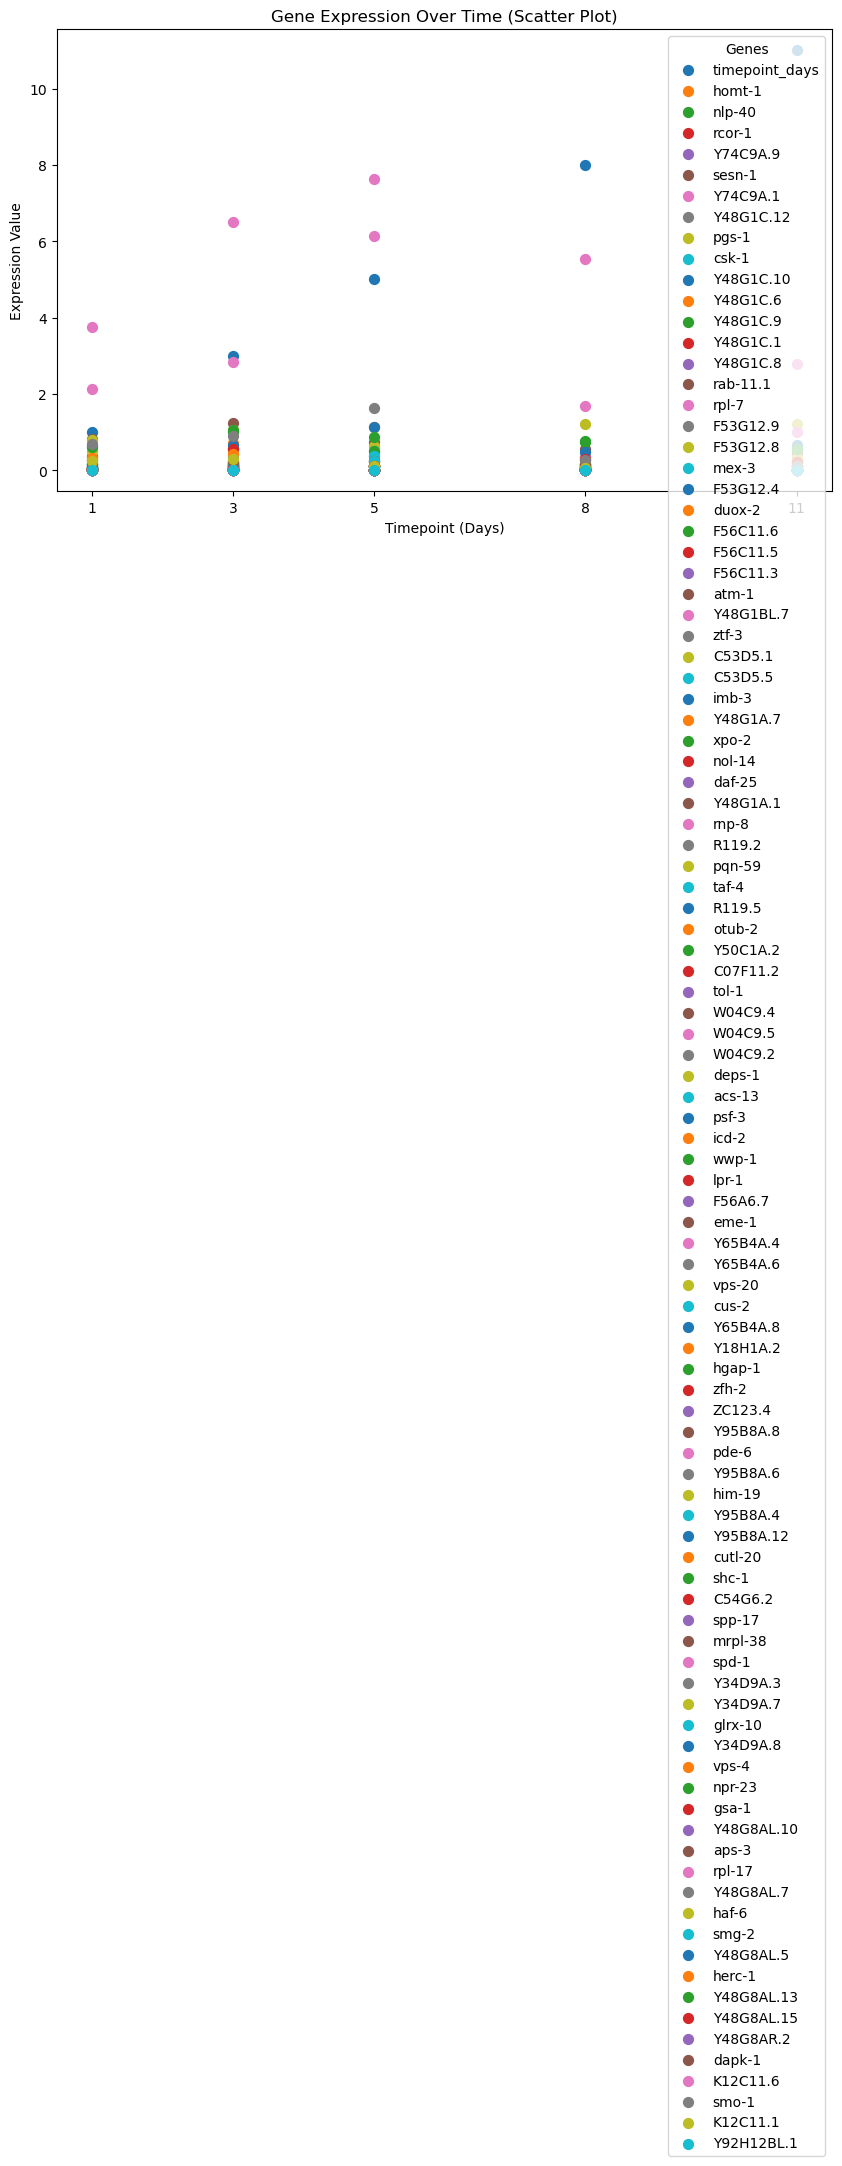

In [ ]:
selected_genes = list(average_data_neuron.columns)[0:100]  # Example with one gene
plot_gene_scatter(average_data_neuron, selected_genes)

unreadable attempt

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


def plot_3d_expression(df):
    # Prepare the data for plotting
    timepoints = df.index.values  # Extract timepoints from the index
    genes = df.columns.values  # Extract genes from the columns
    
    # Map genes to numeric indices
    gene_indices = np.arange(len(genes))  # Create numeric indices for genes
    
    # Create grid for the mesh (each gene-timepoint pair)
    timepoint_grid, gene_grid = np.meshgrid(timepoints, gene_indices)

    # Flatten the grids to create 1D arrays for plotting
    x = gene_grid.flatten()  # X-axis (numeric indices of genes)
    y = timepoint_grid.flatten()  # Y-axis (timepoints)
    z = df.values.flatten()  # Z-axis (expression values)

    # Plotting the 3D scatter plot
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Scatter plot
    sc = ax.scatter(x, y, z, c=z, cmap='viridis', marker='o', s=5)  # Color points based on z-value

    # Labeling axes
    ax.set_xlabel('Gene')
    ax.set_ylabel('Timepoint')
    ax.set_zlabel('Expression Value')

    # Set the title
    ax.set_title('Gene Expression over Time')

    # Set custom ticks for the x-axis to show gene names instead of indices
    ax.set_xticks(gene_indices)
    ax.set_xticklabels(genes, rotation=90, fontsize=8)  # Rotate labels for better readability

    # Show the colorbar to indicate expression values
    fig.colorbar(sc, ax=ax, label='Expression Value')

    # Show plot
    plt.tight_layout()
    plt.show()

# Assuming `df` is your DataFrame with gene expression data
plot_3d_expression(average_data_neuron)